In [97]:
import torch
import torchvision
from PIL import Image
from torchvision.transforms.functional import pil_to_tensor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [98]:
holiday = Image.open("../guy.jpg")

In [99]:

object_detection_model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)
object_detection_model.eval();

holiday_tensor_int = pil_to_tensor(holiday)
holiday_tensor_int = holiday_tensor_int.unsqueeze(dim=0)
holiday_tensor_float = holiday_tensor_int / 255.0
holiday_preds = object_detection_model(holiday_tensor_float)
holiday_preds[0]["boxes"] = holiday_preds[0]["boxes"][holiday_preds[0]["labels"] ==1]
holiday_preds[0]["scores"] = holiday_preds[0]["scores"][holiday_preds[0]["labels"] ==1]
holiday_preds[0]["labels"] = holiday_preds[0]["labels"][holiday_preds[0]["labels"] ==1]
holiday_preds[0]["boxes"] = holiday_preds[0]["boxes"][holiday_preds[0]["scores"] > 0.95]#.detach().numpy()
holiday_preds[0]["labels"] = holiday_preds[0]["labels"][holiday_preds[0]["scores"] > 0.95]#.detach().numpy()
holiday_preds[0]["scores"] = holiday_preds[0]["scores"][holiday_preds[0]["scores"] > 0.95]#.detach().numpy()


c:\Users\chaud\anaconda3\envs\networks\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\chaud\anaconda3\envs\networks\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [100]:
from torchvision.utils import draw_bounding_boxes

holiday_output = draw_bounding_boxes(image=holiday_tensor_int[0],
                             boxes=holiday_preds[0]["boxes"]
                            )


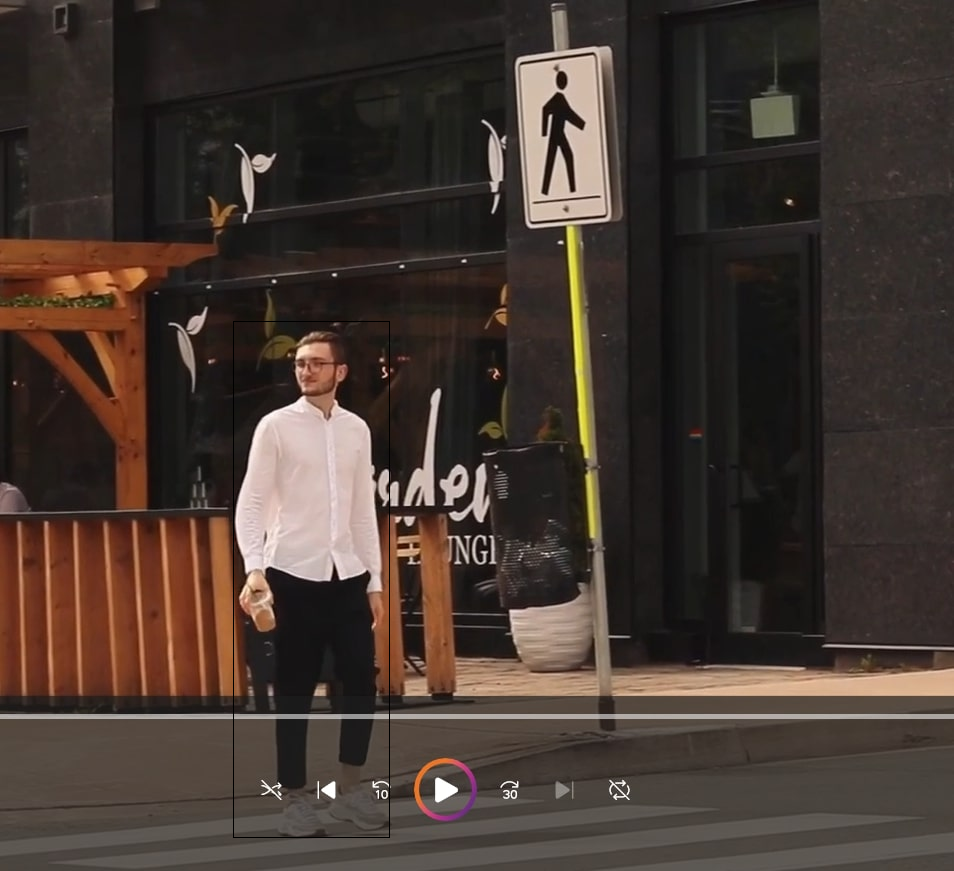

In [101]:
from torchvision.transforms.functional import to_pil_image
to_pil_image(holiday_output)